In [7]:
from labdata.schema import * 

KILOSORT_PARAM_SET_NUM = 4

PARAMS_TO_PLOT = ['num_spikes','depth','firing_rate',
 'isi_contamination','isi_contamination_hill','amplitude_cutoff','presence_ratio',
 'depth_drift_range','depth_drift_fluctuation','spike_amplitude','spike_duration',
 'trough_time','trough_amplitude','fw3m', 'trough_gradient', 'peak_gradient',
 'peak_time', 'peak_amplitude', 'polarity'] # 'position

PARAMS_TO_PLOT = ['num_spikes',
 'isi_contamination','isi_contamination_hill','amplitude_cutoff','presence_ratio',
 'depth_drift_range','depth_drift_fluctuation','spike_amplitude','spike_duration',
 'trough_time','trough_amplitude','fw3m', 'trough_gradient', 'peak_gradient',
 'peak_time', 'peak_amplitude', 'polarity'] # 'position

In [8]:
subjects = set(SpikeSorting().fetch('subject_name'))

all_unit_metrics = []
for s in subjects:
    all_metrics_query = UnitMetrics() & dict(subject_name=s, parameter_set_num=KILOSORT_PARAM_SET_NUM)
    first_session_name = all_metrics_query.fetch('session_name', limit=1)
    if len(first_session_name) == 0:
        continue
    else:
        first_session_name = first_session_name[0]
    print(f'Getting metrics for {s} from {first_session_name}')
    one_session_metrics = all_metrics_query & dict(session_name=first_session_name)
    #one_session_metrics = all_metrics_query

    metrics = one_session_metrics.fetch(as_dict=False)
    all_unit_metrics.extend(metrics)

print(f'\nThere are {len(all_unit_metrics)} neurons to plot.')

Getting metrics for MM013 from 2023-08-16/001
Getting metrics for MM009 from 2023-10-16/001
Getting metrics for MM018 from 2024-02-22/001
Getting metrics for JC142 from 20240119_200700
Getting metrics for _AL031 from 2019-12-02
Getting metrics for MM008 from 2023-03-18/001
Getting metrics for JC131 from 20230720_180000
Getting metrics for _AL032 from 2019-11-22
Getting metrics for MM011 from 2023-11-06/001
Getting metrics for _AL036 from 2020-02-14
Getting metrics for MM012 from 2023-08-08/001

There are 10734 neurons to plot.


In [9]:
# combine sessions into one dict
metrics_dict = dict()
for key in PARAMS_TO_PLOT:
    ind = one_session_metrics.heading.names.index(key)
    metrics_dict[key] = [m[ind] for m in all_unit_metrics]

In [10]:
cutoff_params = dict(isi_contamination=0.1,
                     amplitude_cutoff= 0.1,
                     spike_duration=0.1,
                     spike_amplitude=25,
                     presence_ratio=0.6)

cutoff_direction = dict(isi_contamination='less',
                        amplitude_cutoff='less',
                        spike_duration='greater',
                        spike_amplitude='greater',
                        presence_ratio='greater')

isi_contamination:  54.9748% units pass the cutoff: less than 0.1
amplitude_cutoff:  39.5100% units pass the cutoff: less than 0.1
presence_ratio:  69.9366% units pass the cutoff: greater than 0.6
spike_amplitude:  79.0572% units pass the cutoff: greater than 25
spike_duration:  79.3274% units pass the cutoff: greater than 0.1


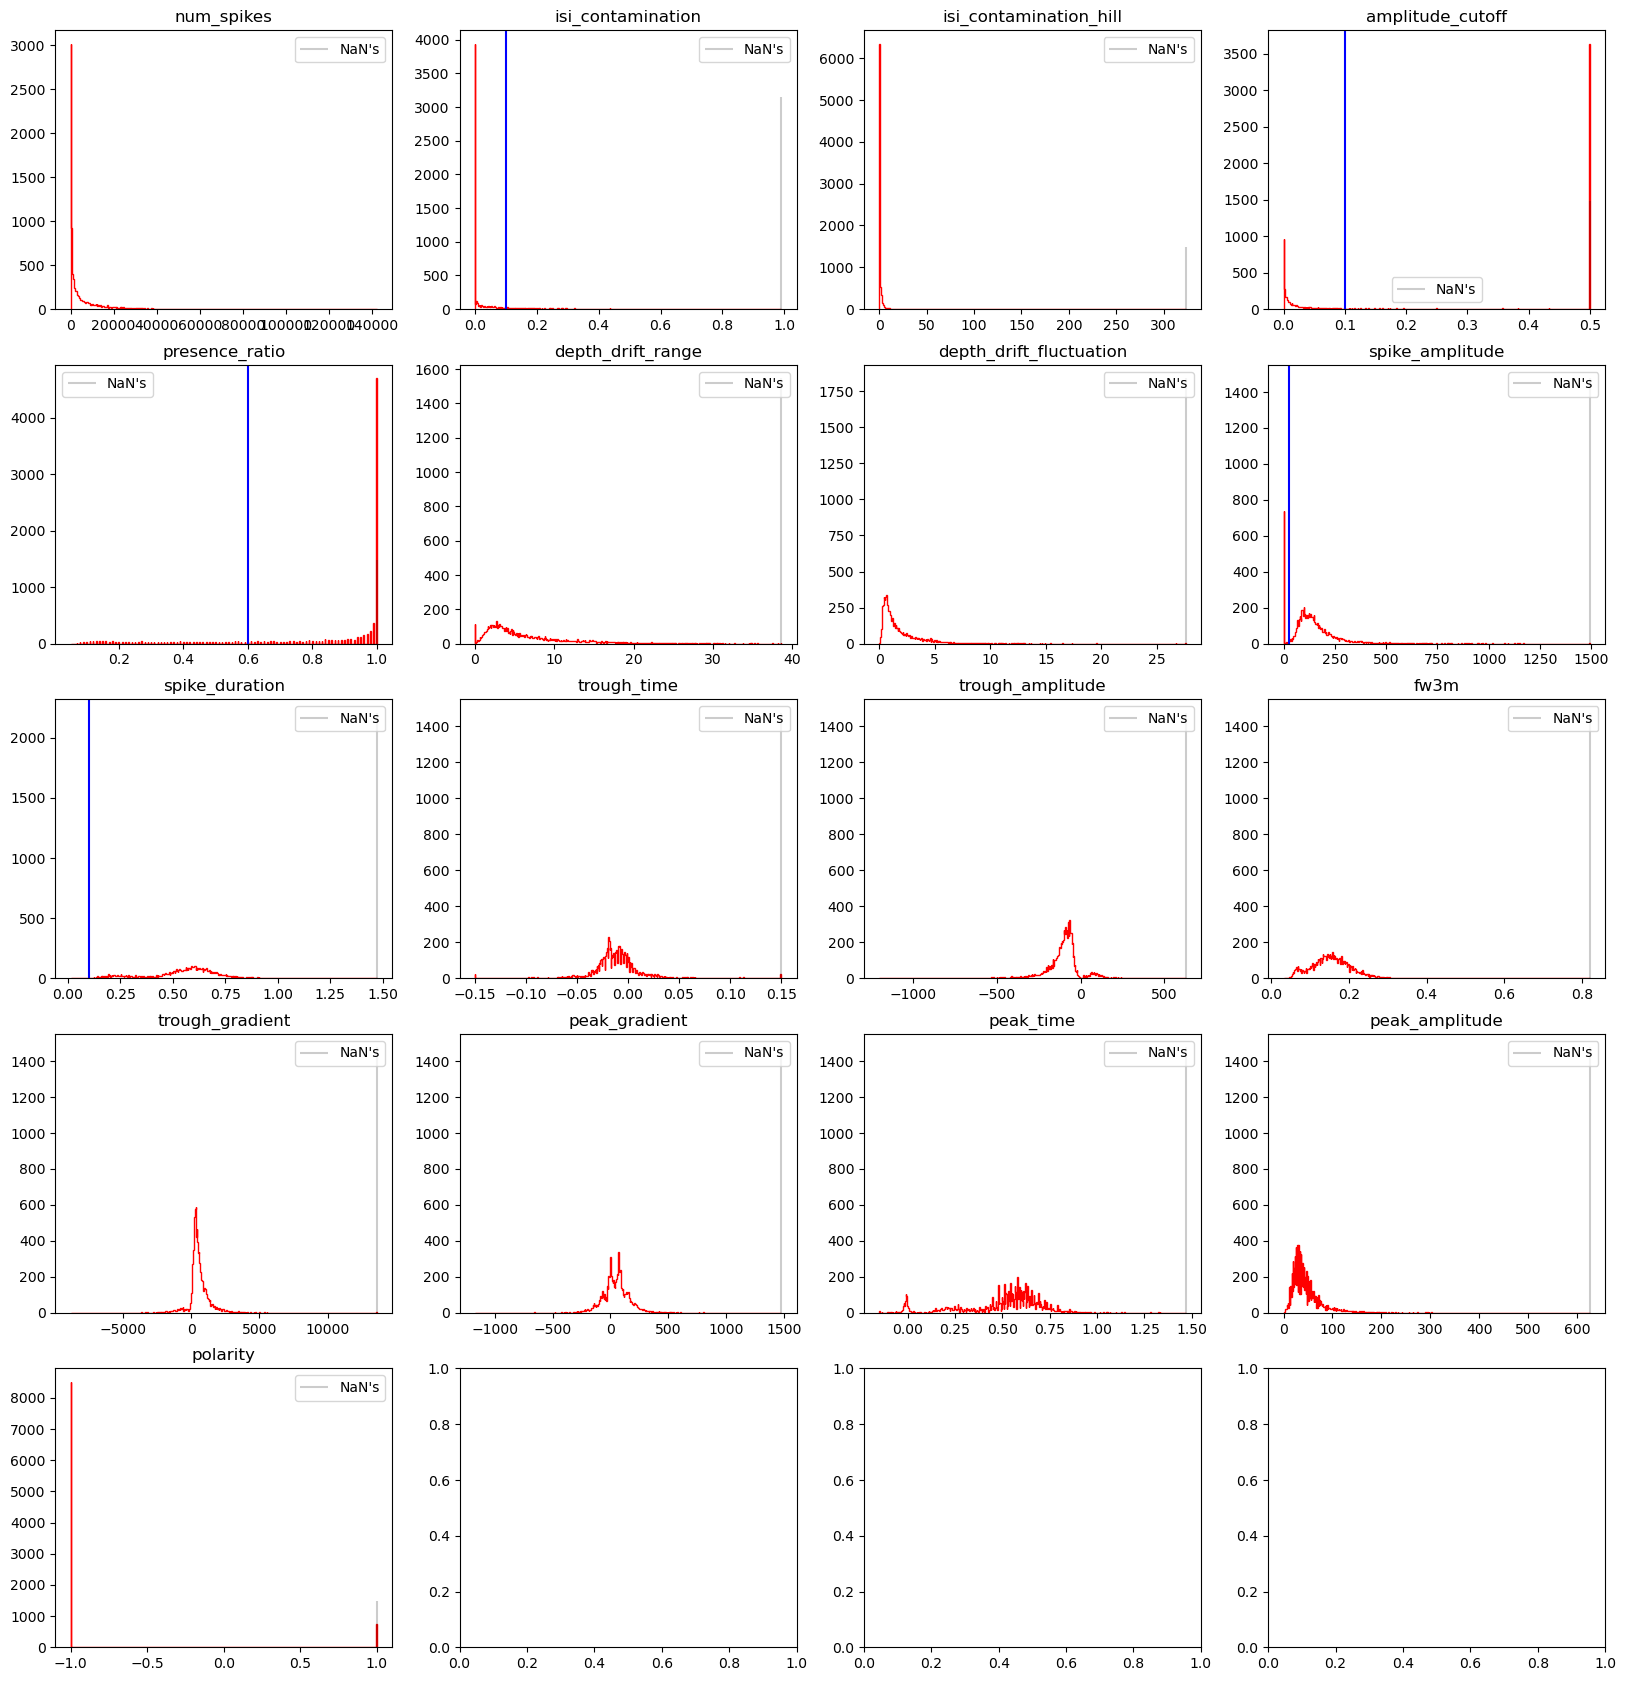

In [11]:
import matplotlib.pyplot as plt
import numpy as np

num_plots = len(metrics_dict)
ncol = 4
fig, axs = plt.subplots(num_plots//ncol+1, ncol, figsize=(20, 5*num_plots//ncol))

for ax,(key,vals) in zip(np.ravel(axs),metrics_dict.items()):
    vals = np.array(vals)
    numnan = np.isnan(vals).sum()
    #print(f'{key}: {numnan} nans')

    ax.hist(vals, bins=500, histtype='step',color='red')
    ax.vlines(np.nanmax(vals)+1e-4, 0, numnan, color='black',alpha=.2,label='NaN\'s')

    if key in cutoff_params:
        ax.axvline(cutoff_params[key], color='blue')
        #ax.axvline(np.log(cutoff_params[key]), color='blue')
        if cutoff_direction[key] == 'less':
            n_passing = (np.array(vals) < cutoff_params[key]).sum()
        elif cutoff_direction[key] == 'greater':
            n_passing = (np.array(vals) > cutoff_params[key]).sum()
        #print(f'{key}: {n_passing} units pass the cutoff')
        print(f'{key}: {n_passing / len(vals)*100 : .4f}% units pass the cutoff: {cutoff_direction[key]} than {cutoff_params[key]}')
    ax.set_title(key)
    ax.legend()

In [12]:
UnitCountCriteria()

unit_count_id,sua_criteria,"mua_criteria if NULL, subtracts the SUA labels."
1,isi_contamination < 0.1 & amplitude_cutoff < 0.1 & spike_duration > 0.1 & spike_amplitude > 25 & presence_ratio > 0.6,None
